<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Clothes%20image%20classification/Models/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Models

Los datos disponibles para el análisis son óptimos para usar en modelos de clasificación o agrupamiento usando aprendizaje no supervisado como K-Means, debido a que se conoce que las imágenes pertenecen a unas clases determinadas, pero a su vez es posible implementar modelos supervisados, ya que se cuenta con las etiquetas de cada una de las imágenes. A continuación se entrenarán modelos de ambos tipos para el conjunto de imágenes ya preprocesado.

### Principal Component Analysis (PCA)

Antes de iniciar con los entrenamientos para predecir el tipo de prenda de cada imagen, puede realizarse un análisis de PCA sobre las imágenes. En la sección anterior se aplicó el método de t-SNE sobre el conjunto para visualizar algún tipo de agrupamiento de los datos que se tienen. Ahora, PCA puede ayudar a determinar el número de pixeles adecuados de cada imagen para describir la varianza deseada:

In [ ]:
pca = PCA() 
pca.fit_transform(x)
summ = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(summ)): 
    if summ[i]>0.9:
        min_comp = i+1
        break
min_comp

82

Donde se estableció $0.9$ como la varianza explicada deseada para las imágenes. Visualmente, dicha varianza acumulada se muestra en la siguiente gráfica:

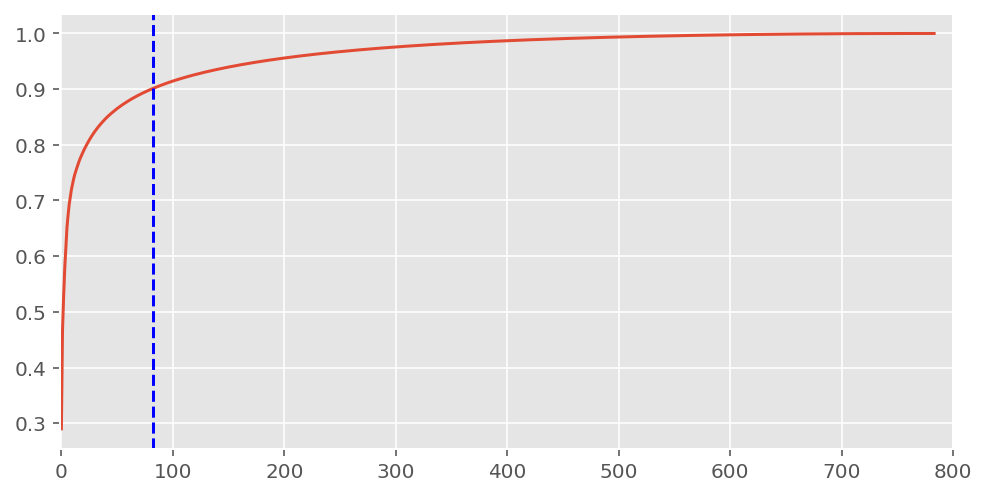

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(summ);
ax.axvline(x = min_comp, color = 'b', ls = '--');
ax.set_xlim(-1,800);

Por lo tanto, se guardarán las nuevas imágenes con dimensión dada según la varianza explicada ya discutida:

In [ ]:
pca = PCA(n_components = min_comp)
pca_data = pca.fit_transform(x)
pca_data.shape

(7000, 82)